In [1]:
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from typing import List

try:
    sys.path.append(glob.glob('../carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla

In [2]:
try:
    client = carla.Client("localhost", 2000)
except Exception as e:
    print(e)
    exit(1)

In [3]:
world: carla.World = client.get_world()
carla_map: carla.Map = world.get_map()
carla_map.name

'Carla/Maps/Town10HD_Opt'

In [4]:
waypoints: List[carla.Waypoint] = carla_map.generate_waypoints(distance=1.0)
spawn_points: List[carla.Transform] = carla_map.get_spawn_points()
len(spawn_points)

155

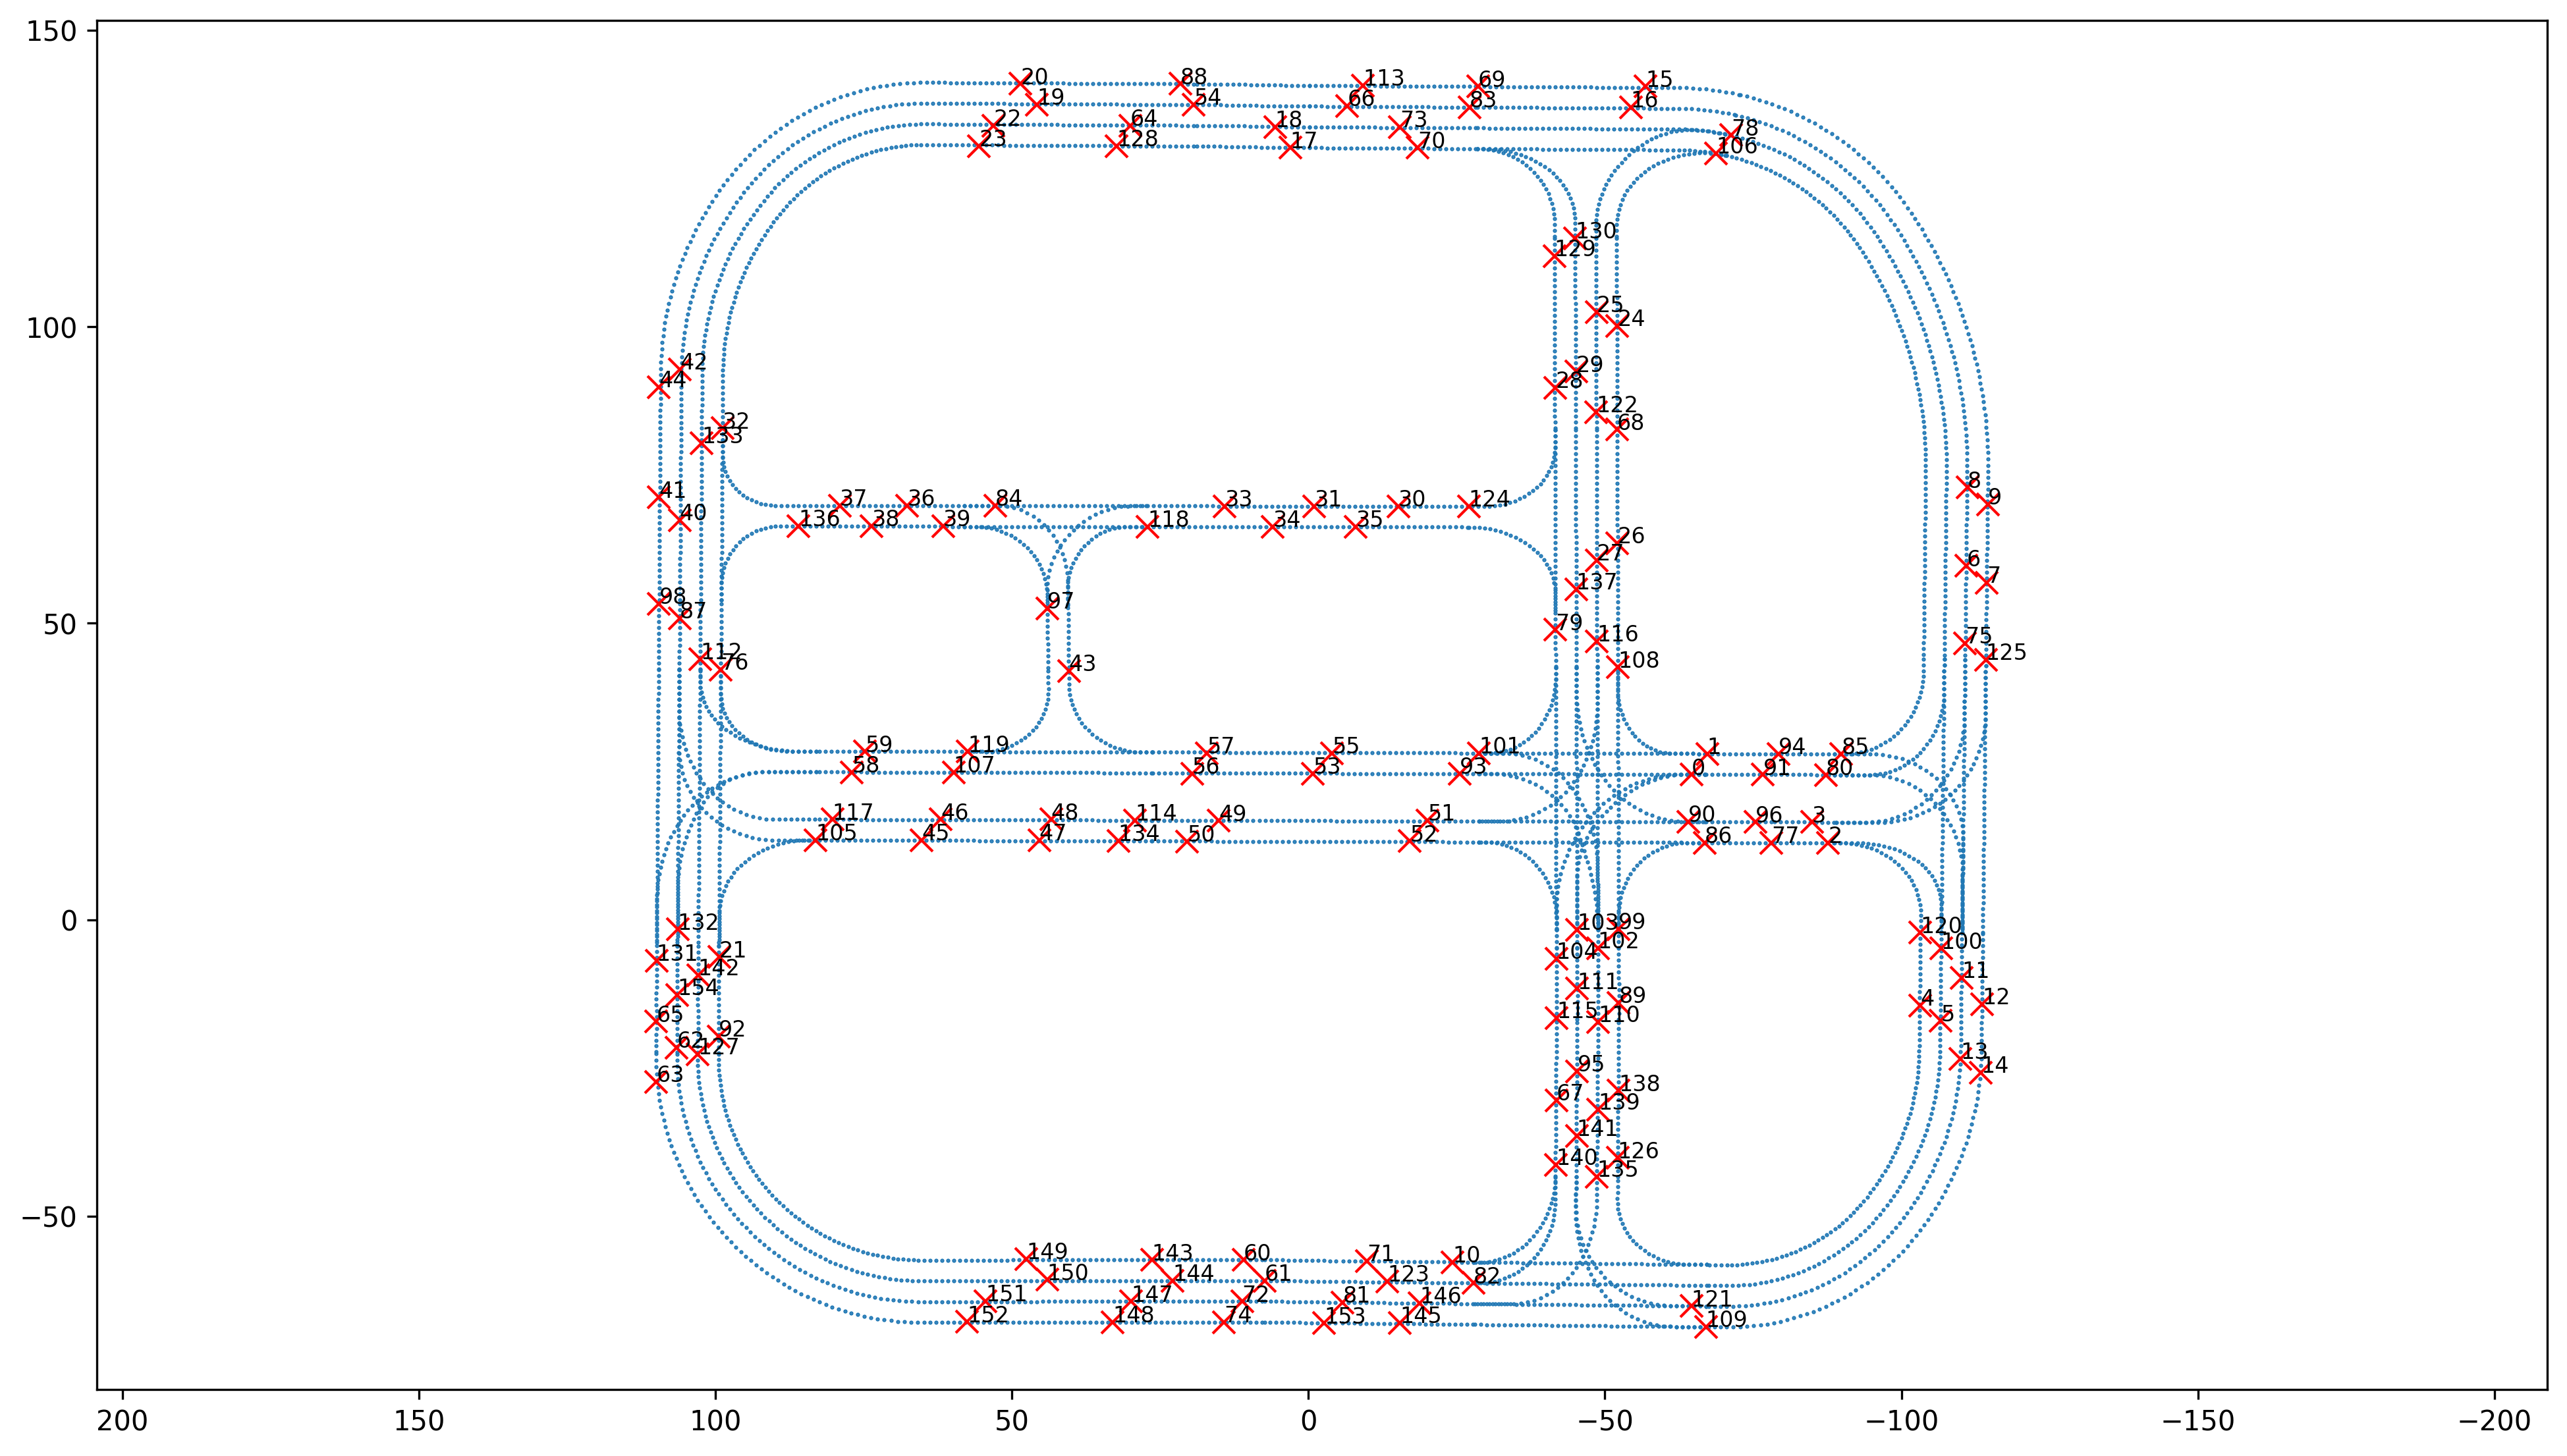

In [5]:
fig = plt.figure(figsize=(16, 9), dpi=300)
ax = fig.add_subplot(1, 1, 1)

x = [waypoint.transform.location.x for waypoint in waypoints]
y = [waypoint.transform.location.y for waypoint in waypoints]
ax.plot(x, y, ".", markersize=1)
ax.axis("equal")

x = [spawn_point.location.x for spawn_point in spawn_points]
y = [spawn_point.location.y for spawn_point in spawn_points]
ax.plot(x, y, "x", color="red", markersize=8)

for i, sp in enumerate(spawn_points):
    ax.text(sp.location.x, sp.location.y, str(i), color="black", fontsize=8)

ax.invert_xaxis()  # Invert the y-axis

plt.axis("equal")
plt.show()